### Introduction to ML in R (`caret` package)

#### Concept
- **caret** = Classification And REgression Training  
- Provides a **unified interface** for machine learning in R  

#### Key Functions
- **Data splitting** → Split dataset into training and testing sets  
- **Preprocessing** → Scaling, centering, normalization, etc.  
- **Feature selection** → Select important variables  
- **Training models** → Fit various ML models (e.g., linear regression, decision trees)  
- **Cross-validation & evaluation** → Assess model performance


In [1]:
install.packages("caret")
install.packages("e1071") # required for some models
library(caret)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice



In [2]:
#Explore available models

names(getModelInfo())


[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"            
 [43] "dwdRadial"           "earth"               "elm"                
 [46] "enet"                "evtree"              "extraTrees"         
 [49] "fda"                 "FH.GBML"             "FIR.DM"             
 [52] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [55] "FS.HGD"              "gam"                 "gamboost"           
 [58] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [61] "gaussprPoly"         "gaussprRadial"       "gbm_h2o"            
 [64] "gbm"                 "gcvEarth"            "GFS.FR.MOGUL"       
 [67] "GFS.LT.RS"           "GFS.THRIFT"          "glm.nb"             
 [70] "glm"                 "glmboost"            "glmnet_h2o"         
 [73] "glmnet"              "glmStepAIC"          "gpls"               
 [76] "hda"                 "hdda"                "hdrda"              
 [79] "HYFIS"               "icr"                 "J48"                
 [82] "JRip"                "kernelpls"           "kknn"               
 [85] "knn"                 "krlsPoly"            "krlsRadial"         
 [88] "lars"                "lars2"               "lasso"              
 [91] "lda"                 "lda2"                "leapBackward"       
 [94] "leapForward"         "leapSeq"             "Linda"              
 [97] "lm"                  "lmStepAIC"           "LMT"                
[100] "loclda"              "logicBag"            "LogitBoost"         
[103] "logreg"              "lssvmLinear"         "lssvmPoly"          
[106] "lssvmRadial"         "lvq"                 "M5"                 
[109] "M5Rules"             "manb"                "mda"                
[112] "Mlda"                "mlp"                 "mlpKerasDecay"      
[115] "mlpKerasDecayCost"   "mlpKerasDropout"     "mlpKerasDropoutCost"
[118] "mlpML"               "mlpSGD"              "mlpWeightDecay"     
[121] "mlpWeightDecayML"    "monmlp"              "msaenet"            
[124] "multinom"            "mxnet"               "mxnetAdam"          
[127] "naive_bayes"         "nb"                  "nbDiscrete"         
[130] "nbSearch"            "neuralnet"           "nnet"               
[133] "nnls"                "nodeHarvest"         "null"               
[136] "OneR"                "ordinalNet"          "ordinalRF"          
[139] "ORFlog"              "ORFpls"              "ORFridge"           
[142] "ORFsvm"              "ownn"                "pam"                
[145] "parRF"               "PART"                "partDSA"            
[148] "pcaNNet"             "pcr"                 "pda"                
[151] "pda2"                "penalized"           "PenalizedLDA"       
[154] "plr"                 "pls"                 "plsRglm"            
[157] "polr"                "ppr"                 "pre"                
[160] "PRIM"                "protoclass"          "qda"                
[163] "QdaCov"              "qrf"                 "qrnn"               
[166] "randomGLM"           "ranger"      

### Train/Test Split & Cross-Validation

#### Concepts

- **Train/Test Split** → Evaluate model performance on unseen data  
  - Training set → Used to train the model  
  - Test set → Used to evaluate the model

- **Cross-Validation (CV)** → Provides a more reliable estimate of model performance  
  - **k-fold CV** → Divide data into k folds; each fold is used as the test set once while the remaining k-1 folds are used for training


In [3]:
#Split dataset

data(iris) # built-in dataset
set.seed(123)
trainIndex <- createDataPartition(iris$Species, p = 0.8, list = FALSE)
trainData <- iris[trainIndex, ]
testData <- iris[-trainIndex, ]

In [4]:
#Cross-validation setup

train_control <- trainControl(method = "cv", number = 5) # 5-fold CV

In [7]:
#Train a model using CV

model <- train(Species ~ ., data = trainData, method = "rf", trControl = train_control)
print(model)


In [9]:
#Evaluate on test set

predictions <- predict(model, newdata = testData)
confusionMatrix(predictions, testData$Species)

In [ ]:
# Linear Regression with a Real Dataset

# Dataset example: Boston Housing (MASS package)

# Predict medv (median house value) using other features.


In [10]:
install.packages("MASS")
library(MASS)

data("Boston")
head(Boston)

set.seed(123)
trainIndex <- createDataPartition(Boston$medv, p = 0.8, list = FALSE)
trainData <- Boston[trainIndex, ]
testData <- Boston[-trainIndex, ]

# Train linear regression
model_lm <- train(medv ~ ., data = trainData, method = "lm")
summary(model_lm)

# Predict and evaluate
predictions <- predict(model_lm, newdata = testData)
postResample(predictions, testData$medv) # RMSE, R-squared


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9550  -2.7996  -0.4647   1.7767  25.0993 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.733617   5.619935   6.714 6.63e-11 ***
crim         -0.093857   0.039157  -2.397 0.016999 *  
zn            0.039436   0.015987   2.467 0.014062 *  
indus        -0.012988   0.069595  -0.187 0.852059    
chas          2.290187   0.940621   2.435 0.015346 *  
nox         -17.130560   4.342272  -3.945 9.45e-05 ***
rm            3.499219   0.451445   7.751 7.87e-14 ***
age           0.009823   0.015510   0.633 0.526905    
dis          -1.390769   0.230614  -6.031 3.77e-09 ***
rad           0.330939   0.077135   4.290 2.25e-05 ***
tax          -0.012386   0.004342  -2.852 0.004568 ** 
ptratio      -0.960676   0.150307  -6.391 4.66e-10 ***
black         0.009841   0.002935   3.353 0.000877 ***
lstat        -0.562095   0.059180  -9.498  < 2e-16 ***
---
Signif

RMSE Rsquared      MAE 
4.588948 0.761126 3.365475

In [ ]:
#Use preProcess() in caret for scaling/normalization.

In [11]:
preProc <- preProcess(trainData, method = c("center", "scale"))
trainData <- predict(preProc, trainData)
testData <- predict(preProc, testData)

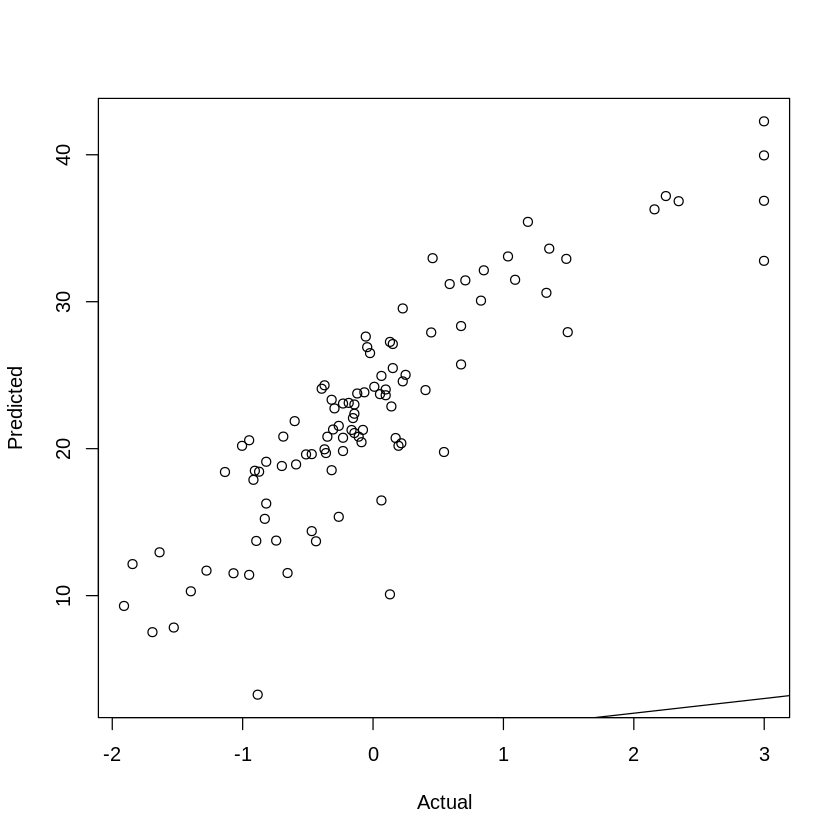

In [12]:
plot(testData$medv, predictions, xlab="Actual", ylab="Predicted")
abline(0,1)

### Basic ML Workflow in R using `caret`

1. **Load dataset**  
   - Import your data into R (e.g., `read.csv()`).

2. **Preprocess data**  
   - Handle missing values, scale/normalize features, encode categorical variables.

3. **Split data**  
   - Divide data into **training** and **testing** sets (e.g., `createDataPartition()` in `caret`).

4. **Train model**  
   - Fit a machine learning model using training data (e.g., `train()` function in `caret`).

5. **Evaluate performance**  
   - Assess model using metrics such as accuracy, RMSE, or confusion matrix on test data.


### Logistic Regression in R (Binary Classification)

#### Concepts

- Logistic regression predicts the **probability of class membership** (0 or 1).  
- Uses the **sigmoid function** to map predicted values between 0 and 1  
- **Common applications:**  
  - Spam detection  
  - Customer churn prediction  
  - Disease prediction


In [13]:
library(caret)

data(iris)
# Create binary target
iris$SpeciesBinary <- ifelse(iris$Species == "setosa", 1, 0)
head(iris)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,SpeciesBinary
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1
6,5.4,3.9,1.7,0.4,setosa,1


In [14]:
set.seed(123)
trainIndex <- createDataPartition(iris$SpeciesBinary, p = 0.8, list = FALSE)
trainData <- iris[trainIndex, ]
testData <- iris[-trainIndex, ]


In [15]:
train_control <- trainControl(method = "cv", number = 5) # 5-fold CV

# Train logistic regression
model_logit <- train(SpeciesBinary ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width,
                     data = trainData,
                     method = "glm",
                     family = "binomial",
                     trControl = train_control)

print(model_logit)


Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numericall

Generalized Linear Model 

120 samples
  4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 96, 96, 96, 96, 96 
Resampling results:

  RMSE          Rsquared   MAE        
  0.0001913641  0.9999995  3.90621e-05



In [21]:
# Predict class labels (0/1)
pred_classes <- predict(model_logit, newdata = testData)

# Ensure predicted and actual classes are factors with the same levels
testData$SpeciesBinary <- factor(testData$SpeciesBinary, levels = c(0, 1))
pred_classes <- factor(pred_classes, levels = c(0, 1))


confusionMatrix(pred_classes, testData$SpeciesBinary)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0  0  0
         1  0 10
                                     
               Accuracy : 1          
                 95% CI : (0.6915, 1)
    No Information Rate : 1          
    P-Value [Acc > NIR] : 1          
                                     
                  Kappa : NaN        
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : NA         
            Specificity :  1         
         Pos Pred Value : NA         
         Neg Pred Value : NA         
             Prevalence :  0         
         Detection Rate :  0         
   Detection Prevalence :  0         
      Balanced Accuracy : NA         
                                     
       'Positive' Class : 0          
                                     

In [ ]:
library(pROC)

roc_obj <- roc(testData$SpeciesBinary, as.numeric(pred_classes))
plot(roc_obj, main="ROC Curve")
auc(roc_obj) # Area under the curve


### Tips for Real Projects (Logistic Regression)

- **Preprocessing**  
  - Scale numeric features using `preProcess()` if needed  

- **Imbalanced classes**  
  - Handle imbalance with techniques like **ROSE** or **SMOTE**  

- **Feature selection**  
  - Logistic regression works best with relevant features  
  - Avoid multicollinearity between predictors  

- **Interpret coefficients**  
  - Use `exp(coef(model))` to get **odds ratios** for easier interpretation


### Decision Trees (`rpart`)

#### Concepts

- **Decision Tree** → Hierarchical model that splits data based on feature values  
- Handles both **classification** and **regression** problems  
- **Advantages:**  
  - Interpretable (easy to visualize)  
  - Can capture non-linear relationships  




In [31]:
#### Installation & Loading

install.packages("rpart")
install.packages("rpart.plot")
library(rpart)
library(rpart.plot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
data(iris)
set.seed(123)
trainIndex <- createDataPartition(iris$Species, p=0.8, list=FALSE)
trainData <- iris[trainIndex, ]
testData <- iris[-trainIndex, ]


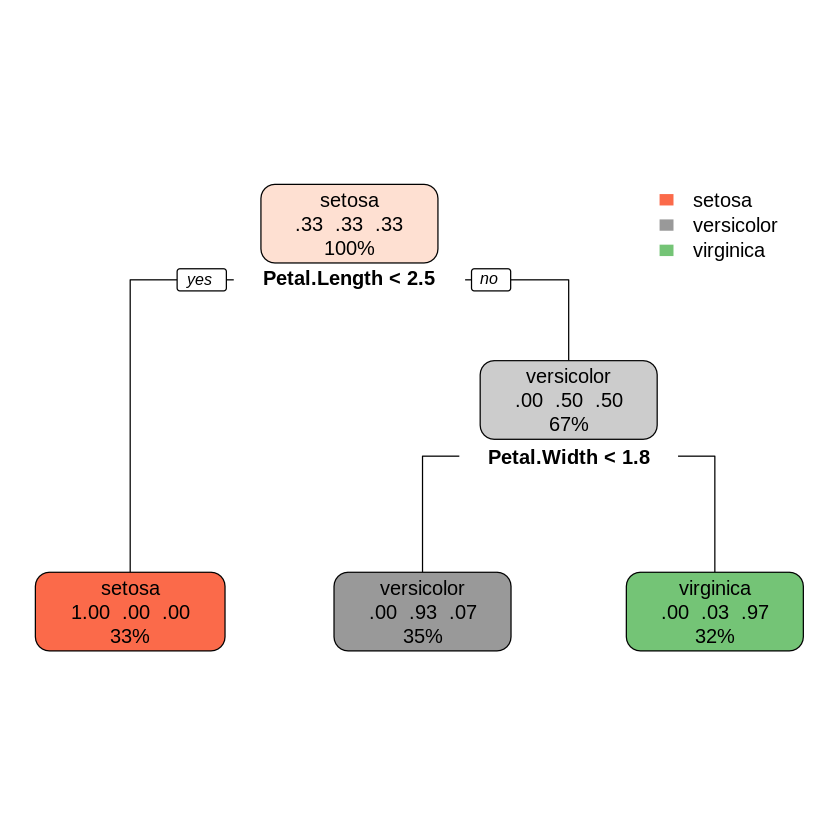

In [33]:
#train decision
model_tree <- rpart(Species ~ ., data=trainData, method="class")
rpart.plot(model_tree)  # visualize tree


In [34]:
#Predict & Evaluate
pred <- predict(model_tree, newdata=testData, type="class")
confusionMatrix(pred, testData$Species)


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         2
  virginica       0          0         8

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.7793, 0.9918)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 8.747e-12       
                                          
                  Kappa : 0.9             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.8000
Specificity                 1.0000            0.9000           1.0000
Pos Pred Value              1.0000            0.8333           1.0000
Neg Pred Value              1.0000            1.0000           0.9091
P


Classification tree:
rpart(formula = Species ~ ., data = trainData, method = "class")

Variables actually used in tree construction:
[1] Petal.Length Petal.Width 

Root node error: 80/120 = 0.66667

n= 120 

    CP nsplit rel error xerror     xstd
1 0.50      0      1.00 1.2000 0.054772
2 0.45      1      0.50 0.7625 0.068456
3 0.01      2      0.05 0.0625 0.027362


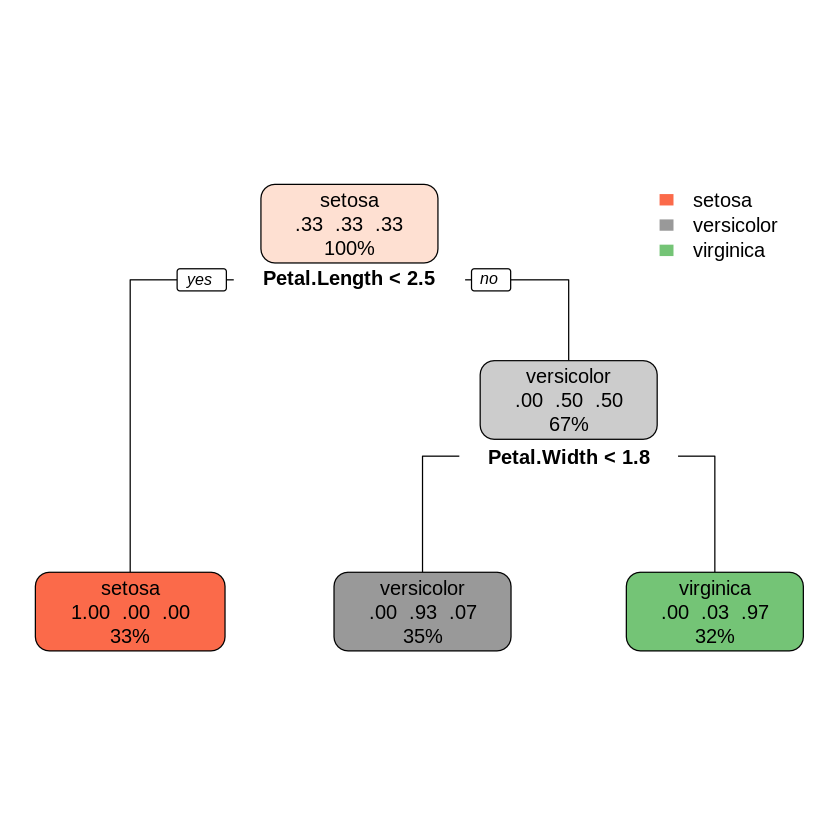

In [35]:
#Prune tree to avoid overfitting using cp parameter.

printcp(model_tree) # complexity parameter table
pruned_tree <- prune(model_tree, cp=0.01)
rpart.plot(pruned_tree)


### Random Forests (`randomForest`)

#### Concepts

- **Random Forest** → Ensemble of multiple decision trees  
- **Advantages:**  
  - Reduces overfitting compared to a single decision tree  
  - Improves prediction accuracy  
- Handles both **classification** and **regression** problems  




In [36]:
install.packages("randomForest")
library(randomForest)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [37]:
#Train Random Forest

set.seed(123)
model_rf <- randomForest(Species ~ ., data=trainData, ntree=100, mtry=2, importance=TRUE)
print(model_rf)


Call:
 randomForest(formula = Species ~ ., data = trainData, ntree = 100,      mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 5%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         40          0         0       0.000
versicolor      0         37         3       0.075
virginica       0          3        37       0.075


In [38]:
#Predict & Evaluate

pred_rf <- predict(model_rf, newdata=testData)
confusionMatrix(pred_rf, testData$Species)


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         2
  virginica       0          0         8

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.7793, 0.9918)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 8.747e-12       
                                          
                  Kappa : 0.9             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.8000
Specificity                 1.0000            0.9000           1.0000
Pos Pred Value              1.0000            0.8333           1.0000
Neg Pred Value              1.0000            1.0000           0.9091
P

,setosa,versicolor,virginica,MeanDecreaseAccuracy,MeanDecreaseGini
Sepal.Length,3.540634,3.8121826,2.153144,5.249041,8.371203
Sepal.Width,2.445852,0.8619364,1.634413,2.533702,1.794376
Petal.Length,8.813047,13.3665825,11.012540,13.844839,30.436610
Petal.Width,11.220717,17.5506744,15.677514,18.302096,38.591978


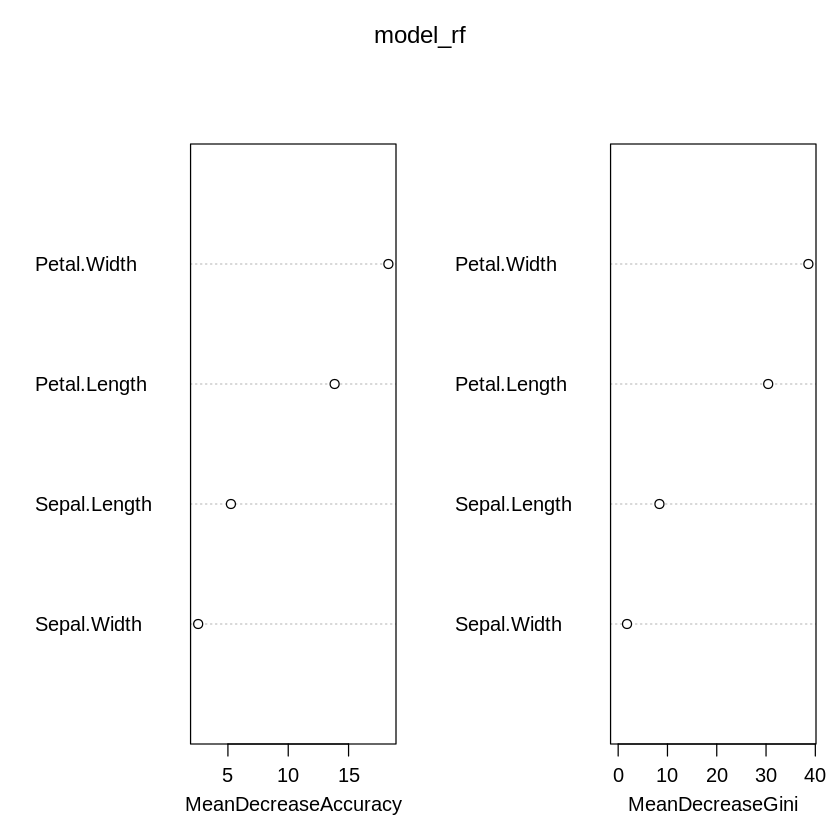

In [40]:
#Feature Importance

importance(model_rf)
varImpPlot(model_rf)

### K-Means Clustering

#### Concepts

- **K-Means** → Unsupervised learning technique  
- Partitions data into **k clusters** by minimizing distance to cluster centroids  
- Does **not require labels** (unsupervised)  
- **Common applications:**  
  - Customer segmentation  
  - Anomaly detection  
  - Market analysis  




In [41]:
data(iris)
head(iris)

# Remove species column for clustering
iris_data <- iris[, -5]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [42]:
# Scale Features

# Scaling is important because K-Means is distance-based.

iris_scaled <- scale(iris_data)

In [43]:
set.seed(123)
kmeans_model <- kmeans(iris_scaled, centers=3, nstart=25)
kmeans_model


K-means clustering with 3 clusters of sizes 50, 53, 47

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1  -1.01119138  0.85041372   -1.3006301  -1.2507035
2  -0.05005221 -0.88042696    0.3465767   0.2805873
3   1.13217737  0.08812645    0.9928284   1.0141287

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2
 [75] 2 3 3 3 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 3 3 3 3 3 3 2 2 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 47.35062 44.08754 47.45019
 (between_SS / total_SS =  76.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [44]:
#Evaluate Clusters
# Compare predicted clusters with actual species.
table(Cluster = kmeans_model$cluster, Species = iris$Species)


       Species
Cluster setosa versicolor virginica
      1     50          0         0
      2      0         39        14
      3      0         11        36

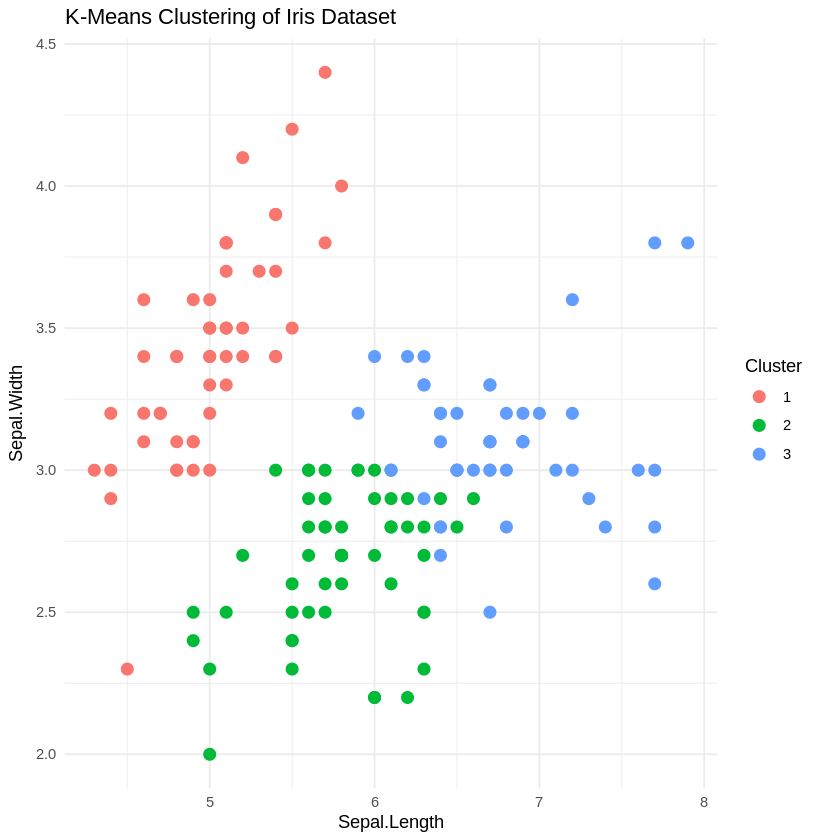

In [45]:
library(ggplot2)
iris$Cluster <- as.factor(kmeans_model$cluster)

ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width, color=Cluster)) +
  geom_point(size=3) +
  labs(title="K-Means Clustering of Iris Dataset") +
  theme_minimal()


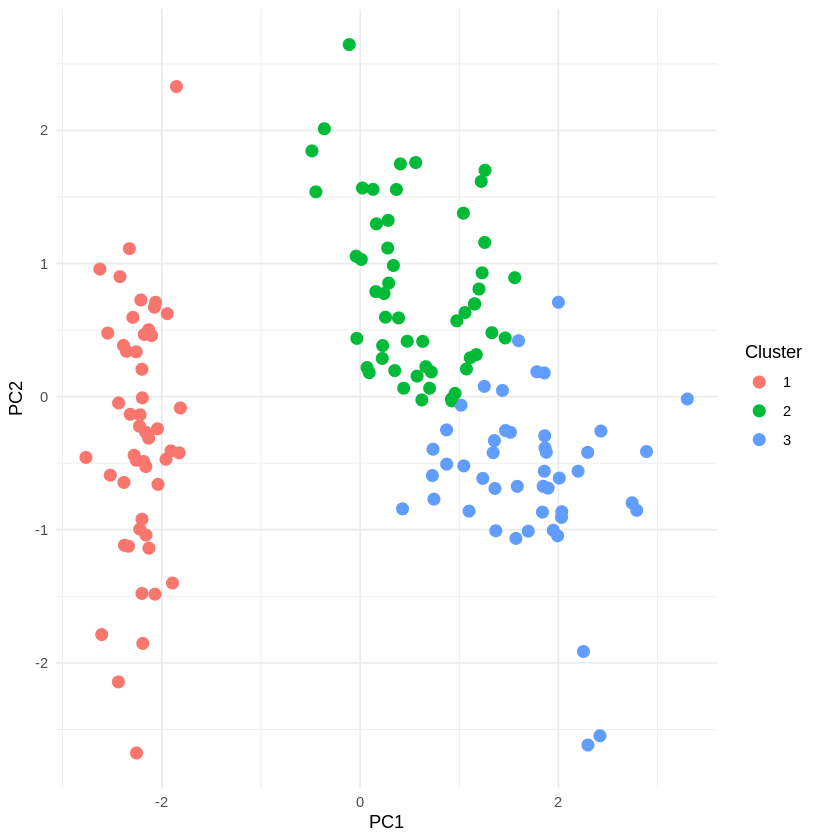

In [46]:
pca <- prcomp(iris_scaled)
iris_pca <- data.frame(pca$x[,1:2], Cluster=iris$Cluster)
ggplot(iris_pca, aes(x=PC1, y=PC2, color=Cluster)) +
  geom_point(size=3) +
  theme_minimal()


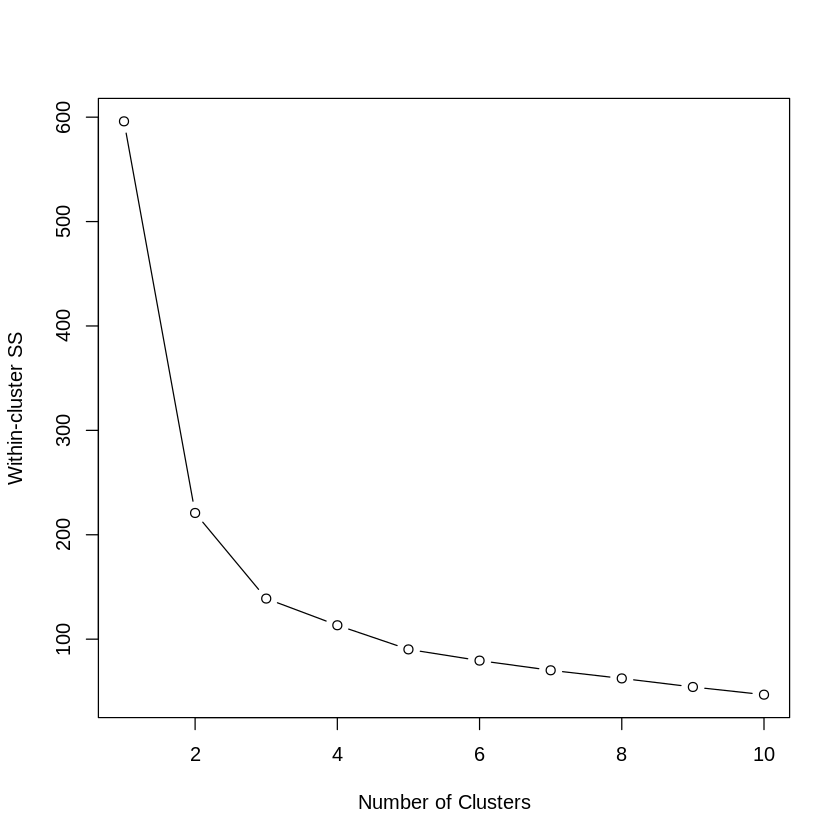

In [47]:
# Tips for Real Projects

# Choosing k: Use Elbow Method or Silhouette Score.

wss <- sapply(1:10, function(k){
  kmeans(iris_scaled, k, nstart=25)$tot.withinss
})
plot(1:10, wss, type="b", xlab="Number of Clusters", ylab="Within-cluster SS")


# Scaling is critical for numeric features.

# K-Means works best with spherical, equally-sized clusters; for other shapes, consider DBSCAN or hierarchical clustering.

### End-to-End ML Workflow in R

1. **Load and Inspect Dataset**  
   - Load your dataset using `read.csv()` or built-in datasets  
   - Inspect with `head()`, `str()`, `summary()`

2. **Convert Categorical Variables**  
   - Use `as.factor()` to convert categorical columns

3. **Split Data into Train/Test**  
   - Typically 80% train, 20% test  
   - Use `createDataPartition()` from `caret`

4. **Scale Numeric Features**  
   - Use `preProcess()` from `caret` for scaling/centering

5. **Train Models**  
   - Logistic Regression → `train(..., method="glm", family="binomial")`  
   - Decision Tree → `rpart()`  
   - Random Forest → `randomForest()`

6. **Evaluate Models**  
   - Confusion matrix → `confusionMatrix()`  
   - ROC curve → `pROC::roc()`  

7. **Optional: K-Means Clustering**  
   - Apply `kmeans()`  
   - Visualize clusters using `ggplot2` or `factoextra`


**Final Project: Heart Disease Prediction & Analysis in R**

**Step 1: Setup & Load Packages**

In [48]:
# Install packages if not already
install.packages(c("caret","dplyr","ggplot2","randomForest","rpart","rpart.plot","pROC"))

# Load libraries
library(caret)
library(dplyr)
library(ggplot2)
library(randomForest)
library(rpart)
library(rpart.plot)
library(pROC)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following object is masked from ‘package:randomForest’:

    combine


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [51]:
data <- read.csv("heart.csv")
str(data)


'data.frame':	1025 obs. of  14 variables:
 $ age     : int  52 53 70 61 62 58 58 55 46 54 ...
 $ sex     : int  1 1 1 1 0 0 1 1 1 1 ...
 $ cp      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ trestbps: int  125 140 145 148 138 100 114 160 120 122 ...
 $ chol    : int  212 203 174 203 294 248 318 289 249 286 ...
 $ fbs     : int  0 1 0 0 1 0 0 0 0 0 ...
 $ restecg : int  1 0 1 1 1 0 2 0 0 0 ...
 $ thalach : int  168 155 125 161 106 122 140 145 144 116 ...
 $ exang   : int  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  1 3.1 2.6 0 1.9 1 4.4 0.8 0.8 3.2 ...
 $ slope   : int  2 0 0 2 1 1 0 1 2 1 ...
 $ ca      : int  2 0 0 1 3 0 3 1 0 2 ...
 $ thal    : int  3 3 3 3 2 2 1 3 3 2 ...
 $ target  : int  0 0 0 0 0 1 0 0 0 0 ...


In [52]:

summary(data)

      age             sex               cp            trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.0000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :1.0000   Median :130.0  
 Mean   :54.43   Mean   :0.6956   Mean   :0.9424   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.0000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.0000   Max.   :200.0  
      chol          fbs            restecg          thalach     
 Min.   :126   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:132.0  
 Median :240   Median :0.0000   Median :1.0000   Median :152.0  
 Mean   :246   Mean   :0.1493   Mean   :0.5298   Mean   :149.1  
 3rd Qu.:275   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak          slope             ca        
 Min.   :

In [53]:
sum(is.na(data))


[1] 0

In [57]:
#  Preprocessing

# Convert categorical variables to factors
data$sex <- as.factor(data$sex)
data$cp <- as.factor(data$cp)
data$fbs <- as.factor(data$fbs)
data$restecg <- as.factor(data$restecg)
data$exang <- as.factor(data$exang)
data$slope <- as.factor(data$slope)
data$ca <- as.factor(data$ca)
data$thal <- as.factor(data$thal)
data$target <- as.factor(data$target) # binary target


In [60]:
# Train/Test Split

set.seed(123)
trainIndex <- createDataPartition(data$target, p=0.8, list=FALSE)
trainData <- data[trainIndex, ]
testData <- data[-trainIndex, ]


In [59]:
# Scaling Numeric Features

num_cols <- c("age","trestbps","chol","thalach","oldpeak")
preProc <- preProcess(trainData[, num_cols], method=c("center","scale"))
trainData[, num_cols] <- predict(preProc, trainData[, num_cols])
testData[, num_cols] <- predict(preProc, testData[, num_cols])


In [61]:
#Logistic Regression

set.seed(123)
train_control <- trainControl(method="cv", number=5)
logit_model <- train(target ~ ., data=trainData, method="glm", family="binomial", trControl=train_control)
summary(logit_model)

pred_logit <- predict(logit_model, newdata=testData)
confusionMatrix(pred_logit, testData$target)




Call:
NULL

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.676846   2.179811  -0.311 0.756176    
age          0.024069   0.015611   1.542 0.123129    
sex1        -1.987806   0.350643  -5.669 1.44e-08 ***
cp1          1.053975   0.337105   3.127 0.001769 ** 
cp2          2.062266   0.319080   6.463 1.03e-10 ***
cp3          2.380594   0.432098   5.509 3.60e-08 ***
trestbps    -0.023670   0.007271  -3.255 0.001133 ** 
chol        -0.006148   0.002564  -2.398 0.016507 *  
fbs1         0.294744   0.355875   0.828 0.407544    
restecg1     0.609155   0.243480   2.502 0.012354 *  
restecg2    -0.680725   1.517673  -0.449 0.653769    
thalach      0.024266   0.007409   3.275 0.001055 ** 
exang1      -0.514940   0.281596  -1.829 0.067452 .  
oldpeak     -0.369827   0.153512  -2.409 0.015992 *  
slope1      -0.386841   0.528066  -0.733 0.463826    
slope2       0.727350   0.569128   1.278 0.201247    
ca1         -2.143907   0.309255  -6.932 4.13e-12 ***
c

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 82 10
         1 17 95
                                          
               Accuracy : 0.8676          
                 95% CI : (0.8133, 0.9109)
    No Information Rate : 0.5147          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7345          
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 0.8283          
            Specificity : 0.9048          
         Pos Pred Value : 0.8913          
         Neg Pred Value : 0.8482          
             Prevalence : 0.4853          
         Detection Rate : 0.4020          
   Detection Prevalence : 0.4510          
      Balanced Accuracy : 0.8665          
                                          
       'Positive' Class : 0               
                                    

Setting levels: control = 1, case = 2

Setting direction: controls < cases



Area under the curve: 0.953

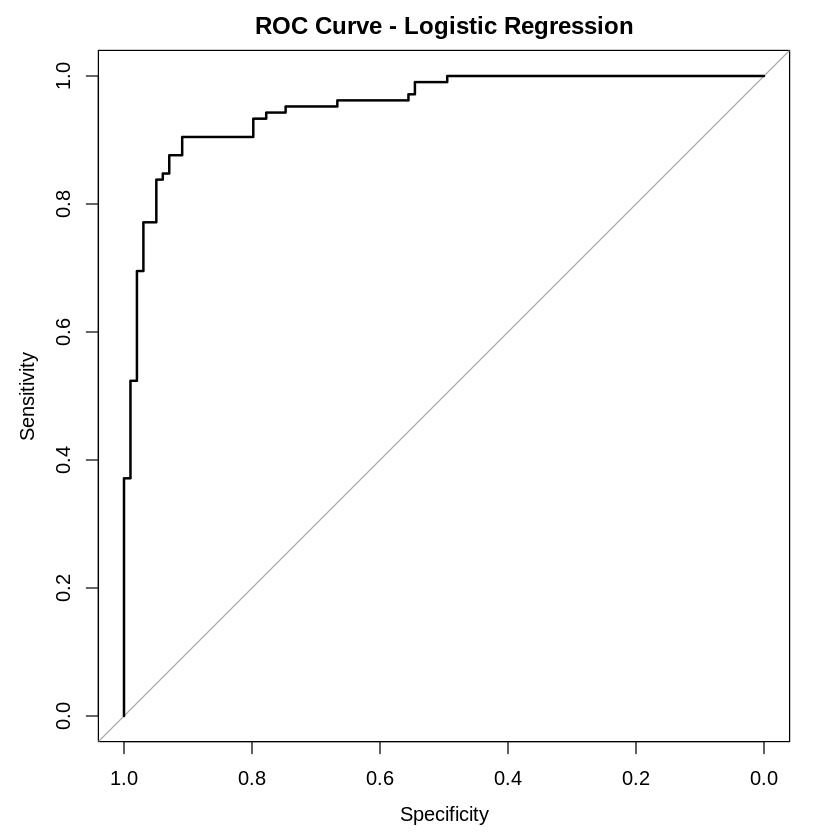

In [62]:
# ROC Curve for Logistic Regression
pred_prob_logit <- predict(logit_model, newdata=testData, type="prob")[,2]
roc_logit <- roc(as.numeric(testData$target), pred_prob_logit)
plot(roc_logit, main="ROC Curve - Logistic Regression")
auc(roc_logit)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 82 10
         1 17 95
                                          
               Accuracy : 0.8676          
                 95% CI : (0.8133, 0.9109)
    No Information Rate : 0.5147          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7345          
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 0.8283          
            Specificity : 0.9048          
         Pos Pred Value : 0.8913          
         Neg Pred Value : 0.8482          
             Prevalence : 0.4853          
         Detection Rate : 0.4020          
   Detection Prevalence : 0.4510          
      Balanced Accuracy : 0.8665          
                                          
       'Positive' Class : 0               
                                    

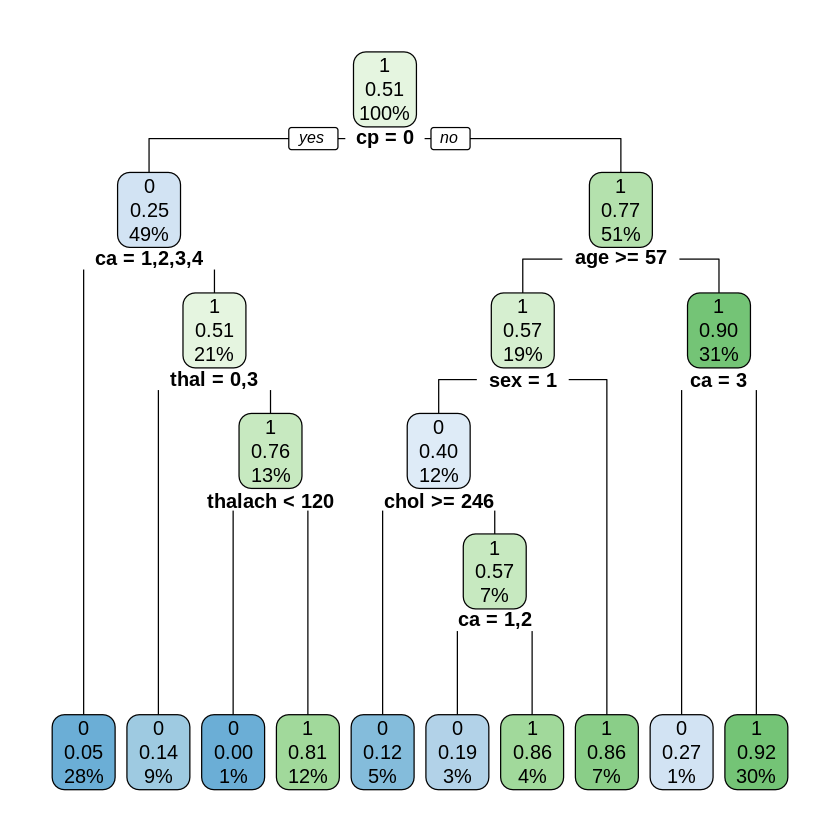

In [63]:
#  Decision Tree

tree_model <- rpart(target ~ ., data=trainData, method="class")
rpart.plot(tree_model)

pred_tree <- predict(tree_model, newdata=testData, type="class")
confusionMatrix(pred_tree, testData$target)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  99   0
         1   0 105
                                     
               Accuracy : 1          
                 95% CI : (0.9821, 1)
    No Information Rate : 0.5147     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4853     
         Detection Rate : 0.4853     
   Detection Prevalence : 0.4853     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

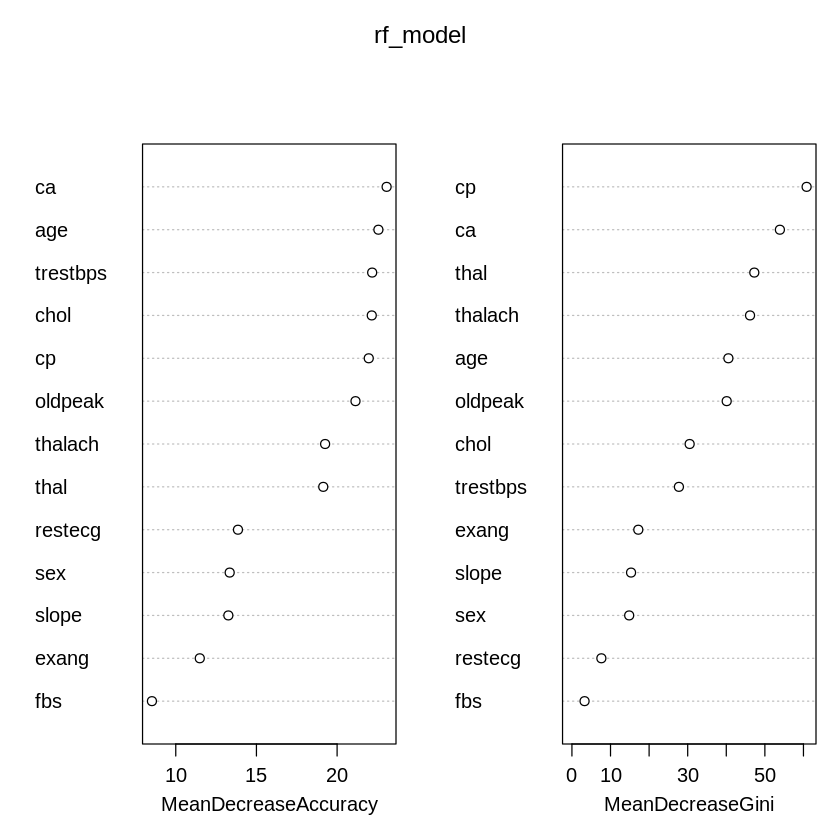

In [64]:
 #Random Forest
rf_model <- randomForest(target ~ ., data=trainData, ntree=100, importance=TRUE)
pred_rf <- predict(rf_model, newdata=testData)
confusionMatrix(pred_rf, testData$target)

varImpPlot(rf_model)

In [65]:
#  K-Means Clustering on Numeric Features

num_data <- data[, num_cols]
num_data_scaled <- scale(num_data)

set.seed(123)
kmeans_model <- kmeans(num_data_scaled, centers=2, nstart=25)
table(Cluster=kmeans_model$cluster, Target=data$target)

       Target
Cluster   0   1
      1 313 117
      2 186 409

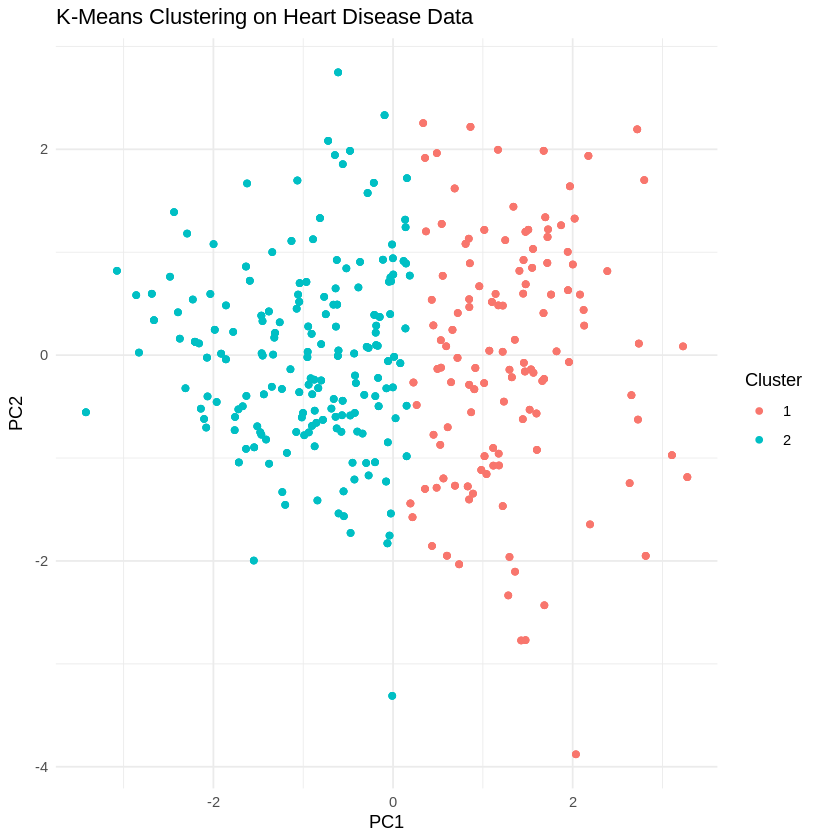

In [66]:


# PCA Visualization
pca <- prcomp(num_data_scaled)
pca_df <- data.frame(PC1=pca$x[,1], PC2=pca$x[,2], Cluster=factor(kmeans_model$cluster))
ggplot(pca_df, aes(x=PC1, y=PC2, color=Cluster)) + geom_point() + theme_minimal() +
  labs(title="K-Means Clustering on Heart Disease Data")